# Studi Kasus: Unsupervised Learning

## <a id="toc">Table of Content</a>
1. [Clustering Olivetti Faces](#olivetti)
2. [Using Gaussian mixture model](#mixture)

Kita import semua _libraries_.

In [1]:
from packaging import version
import numpy as np
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## <a id="olivetti">Clustering dataset Olivetti Faces</a> (Back to [TOC](#toc))

<div>
    <img src="images-ch09/olivetti-faces.png" width=500>
</div>    

- Dataset Olivetti faces berisi  400 grayscale 64 × 64–pixel gambar wajah orang.
- Setiap gambar di-_flatten_ menjadi vektor 1D dengan panjang 4,096 (empat ribu sembilan puluh enam).
- Empat puluh wajah orang yang berbeda difoto (10× untuk setiap orang).
- Task untuk dataset ini umumnya adalah melatih model yang digunakan untuk memprediksi orang yang direpresentasikan di foto.

Mari kita load the dataset dengan menggunakan fungsi `sklearn.datasets.fetch_olivetti_faces()`.

In [4]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Kita lihat deskripsi dataset Olivetti.

In [5]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

Kita tampilkan nilai target-target-nya.   
Terlihat bahwa terdapat 40 nilai dari 0 s.d. 39, yang berarti 40 orang.

In [6]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [7]:
olivetti.data.shape

(400, 4096)

- Selanjutnya, anda akan bagi dataset menjadi training set, validation set, dan test set.    
- Perhatikan bahwa dataset ini sudah dikenakan normalisasi/standarisasi sehingga nilai pixel-nilai pixel berada di antara 0 dan 1.    
- Karena dataset ini cukup kecil, anda akan menggunakan stratified sampling.

### Pertanyaan Refleksi
> Mengapa stratified sampling digunakan pada dataset ini?

Jawab:
stratified sampling digunakan untuk menjaga keseimbangan distribusi kelas dalam setiap subset data, yang sangat penting untuk dataset yang kecil dan memiliki banyak kelas seperti dataset Olivetti Faces.


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [23]:
print(f"Jumlah instance pada train set: {X_train.shape[0]}")
print(f"Jumlah instance pada validation set: {X_valid.shape[0]}")
print(f"Jumlah instance pada test set: {X_test.shape[0]}")

Jumlah instance pada train set: 280
Jumlah instance pada validation set: 80
Jumlah instance pada test set: 40


### Pertanyaan refleksi
 1. Berapakah jumlah instance pada train set? 280
 2. Berapakah jumlah instance pada validation set? 80
 3. Berapakah jumlah instance pada test set? 40

Sebagai eksperimen, _dimensionality_ dari dataset akan dikurangi dengan menggunakan PCA dengan mempertahankan _explained variance ratio_ 99%:

In [10]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)


Silakan anda tampilkan jumlah principal components dari `pca` yang sudah dilatih.

In [11]:
pca.n_components_

np.int64(199)

### Pertanyaan Refleksi
Berapakah jumlah _principal components_ yang dibutuhkan untuk mempertahankan _explained variance ratio_ 99%? 199


Kemudian, anda akan melakukan _clustering_ dengan menggunakan K-means. Akan tetapi, anda harus menentukan jumlah cluster yang bagus. Oleh karena itu, anda akan
1. membuat `KMeans` untuk suatu nilai jumlah cluster tertentu,
2. mengumpulkan `KMeans` yang sudah dibuat ke dalam list, dan
3. membuat
    - plot dengan sumbu $x$, jumlah cluster dan sumbu $y$, nilai _silhouette score_.
    - plot dengan sumbu $x$, jumlah cluster dan sumbu $y$, nilai _inertia_.

Anda akan membuat model `KMeans` dengan jumlah cluster dari 5, 10, 15, 20, $\ldots$, 150.     
**Catatan**: gunakan `random_state=42`

In [26]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")

    # Buatlah kmeans dengan jumlah cluster k dan random_state=42
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Latih kmeans dengan data latih
    kmeans.fit(X_train_pca)

    # Kumpulkan kmeans yang sudah dilatih ke dalam list
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


Selanjutnya, anda akan
1. menghitung nilai _**silhouette score**_ dari setiap model `KMeans` yang sudah dibuat.
2. mencari best `k` (jumlah cluster).
3. mencari best `score` dari semua silhouette score.

**Tip**:
Anda dapat menggunakan `np.argmax` untuk mencari indeks dengan nilai **silhouette score** kemudian memakai indeks tersebut untuk mencari best `k` dan best `score`.

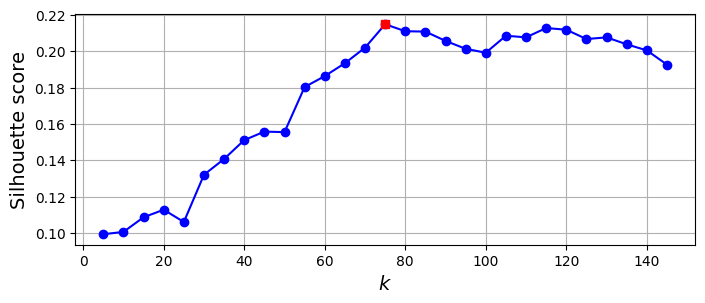

In [27]:
from sklearn.metrics import silhouette_score

# Hitunglah silhouette score dari setiap model di kmeans_per_k dan
# simpan scores-nya dalam variabel silhouette_scores
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

# tentukan best_index dari silhouette scores yang terbesar
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]

best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

### Pertanyaan Refleksi
> Berapakah nilai `k` yang memberikan silhouette score terbaik? 75

In [28]:
best_k

75

Jumlah cluster yang anda temukan cukup besar ya ... padahal anda _expect_ jumlah cluster sekitar 40 ya karena terdapat 40 wajah orang yang berbeda pada gambar. Akan tetapi, wajah orang yang sama mungkin menjadi wajah yang berbeda ketika wajah tersebut difoto dari sudut yang berbeda atau memakai kacamata.   

Dengan menggunakan cara yang sama seperti nilai **silhouette score**, plot-lah grafik dengan sumbu $x$, jumlah cluster dan sumbu $y$, nilai _inertia_.

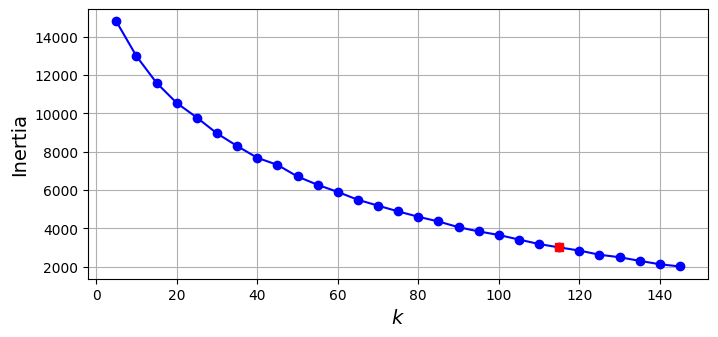

In [15]:
# Hitunglah inertia dari setiap model di kmeans_per_k dan
# simpan inertia-nya dalam variabel inertias
inertias = [model.inertia_ for model in kmeans_per_k]



best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

Jumlah cluster terbaik tidak begitu jelas dalam diagram inertia ini karena tidak ada _**elbow**_ yang jelas, anda tentukan jumlah cluster terbaik adalah `k=120`.

In [16]:
best_model = kmeans_per_k[best_index]

Selanjutnya, anda akan menvisualisasikan *the clusters* ....     
Apakah anda melihat wajah-wajah yang mirip dalam setiap cluster? Ya

In [17]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Output hidden; open in https://colab.research.google.com to view.

## <a id="mixture">Gaussian Mixture Model untuk dataset Olivetti Faces</a> (Back to [TOC](#toc))

- Dalam bagian ini, anda akan melatih Gaussian _mixture model_ pada dataset Olivetti faces.
- Untuk mempercepat algoritma, anda sebaiknya mengurangi _dimensionality_ dari dataset dengan menggunakan PCA dan mempertahankan _explained variance ratio_ 99%.

Silakan anda buat suatu model Gaussian mixture dengan banyak komponen sebanyak **40** dan `random_state=42`.

In [30]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)


Silakan anda gunakan method `fit` untuk melatih model `GaussianMixture`.

In [31]:
gm.fit(X_train_pca)

GaussianMixture(n_components=40, random_state=42)

Setelah anda melatih model `GaussianMixture`, silakan anda _generate_ 20 muka baru dengan menggunakan method `sample()`.    
Karena sebelumnya anda menggunakan PCA, anda perlu menggunakan method `inverse_transform()` untuk membalikkan gambar ke gambar originalnya.

In [32]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

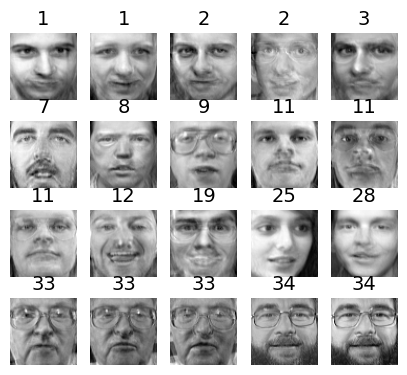

In [33]:
plot_faces(gen_faces, y_gen_faces)

<center>
    <h1>The End</h1>
</center>    